#SECTION B : CLUSTERING PROCESS

###PART 0 : RESULTS FROM PREVIOUS DATA PREPARATION

> Wage Dataset

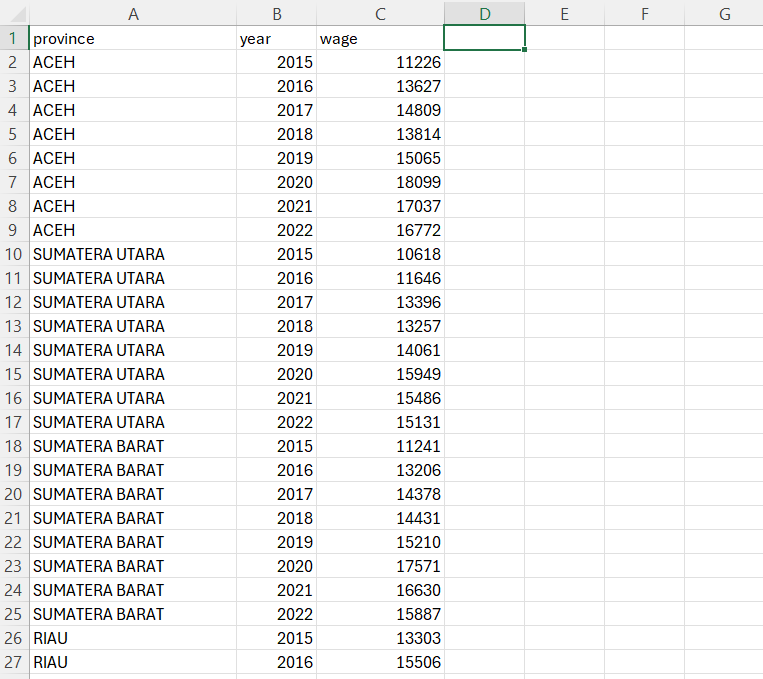

> Poverty Line Dataset

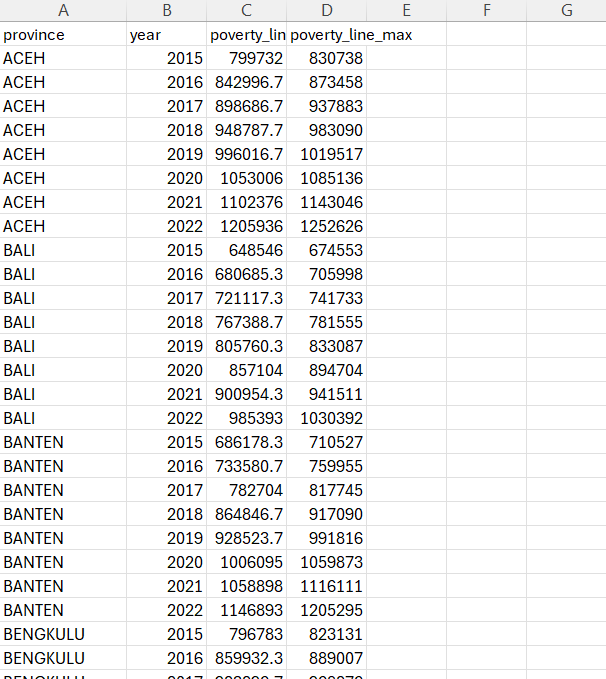

> Expenses Dataset

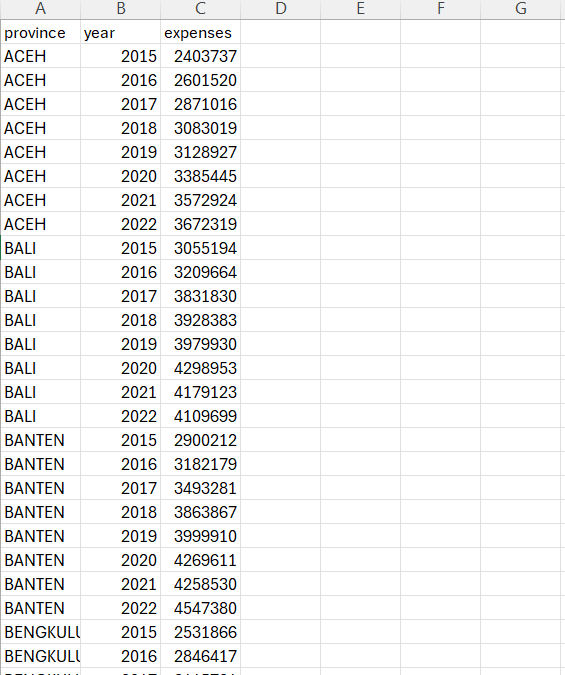

###PART 1 : COMBINING SEPARATE CSV DATASET INTO ONE DATAFRAME

> First, load the .csv files containing clean datasets (after **DataPreparation.ipynb**)

> Next, we try to find the average of each feature for each province.
> * For instance, we have data on the WAGE of province ACEH from years 2015-2022. Take the average of all wages from those years.


In [1]:
import pandas as pd

# Step 1: Read the CSV files into dataframes
expenses_df = pd.read_csv('expenses_df.csv')
wage_df = pd.read_csv('wage_df.csv')
pov_df = pd.read_csv('pov_df.csv')

In [2]:
# Step 2: Define functions to calculate the average values

def averagesum_expenses(expenses_df):
    # Group by 'province' and calculate the mean of 'expenses'
    avg_expenses_df = expenses_df.groupby('province')['expenses'].mean().reset_index()
    avg_expenses_df.rename(columns={'expenses': 'average_expenses'}, inplace=True)
    return avg_expenses_df

def averagesum_wage(wage_df):
    # Group by 'province' and calculate the mean of 'wage'
    avg_wage_df = wage_df.groupby('province')['wage'].mean().reset_index()
    avg_wage_df.rename(columns={'wage': 'average_wage'}, inplace=True)
    return avg_wage_df

def averagesum_pov(pov_df):
    # Group by 'province' and calculate the mean of 'pov_line_max'
    avg_pov_df = pov_df.groupby('province')['poverty_line_max'].mean().reset_index()
    avg_pov_df.rename(columns={'poverty_line_max': 'average_pov_line_max'}, inplace=True)
    return avg_pov_df

> The dataframe below shows the average expenses for all provinces in Indonesia.

In [3]:
avg_expenses_df = averagesum_expenses(expenses_df)
print(avg_expenses_df)

                province  average_expenses
0                   ACEH       3089863.375
1                   BALI       3824097.000
2                 BANTEN       3814371.250
3               BENGKULU       3292523.750
4          DI YOGYAKARTA       3513916.375
5            DKI JAKARTA       4240640.125
6              GORONTALO       2941308.375
7              INDONESIA       3314636.250
8                  JAMBI       3278640.625
9             JAWA BARAT       3388137.625
10           JAWA TENGAH       2760638.125
11            JAWA TIMUR       2991347.375
12      KALIMANTAN BARAT       3220137.875
13    KALIMANTAN SELATAN       3696008.875
14     KALIMANTAN TENGAH       3732967.500
15      KALIMANTAN TIMUR       4487493.125
16      KALIMANTAN UTARA       4077647.000
17  KEP. BANGKA BELITUNG       4213648.875
18             KEP. RIAU       4445915.625
19               LAMPUNG       2891976.625
20                MALUKU       3030715.375
21          MALUKU UTARA       3184953.500
22   NUSA T

> The dataframe below shows the average wages for all provinces in Indonesia.

In [4]:
avg_wage_df = averagesum_wage(wage_df)
print(avg_wage_df)

                province  average_wage
0                   ACEH     15056.125
1                   BALI     15763.125
2                 BANTEN     21037.750
3               BENGKULU     15127.000
4          DI YOGYAKARTA     13300.625
5            DKI JAKARTA     25782.500
6              GORONTALO     13164.375
7              INDONESIA     15582.250
8                  JAMBI     14585.625
9             JAWA BARAT     16785.000
10           JAWA TENGAH     11335.875
11            JAWA TIMUR     12787.500
12      KALIMANTAN BARAT     14933.750
13    KALIMANTAN SELATAN     16465.375
14     KALIMANTAN TENGAH     18070.125
15      KALIMANTAN TIMUR     21252.000
16      KALIMANTAN UTARA     20426.375
17  KEP. BANGKA BELITUNG     15814.625
18             KEP. RIAU     22516.750
19               LAMPUNG     12428.875
20                MALUKU     17942.750
21          MALUKU UTARA     17578.625
22   NUSA TENGGARA BARAT     11469.375
23   NUSA TENGGARA TIMUR     13575.875
24                 PAPUA 

> The dataframe below shows the average expenses for all provinces in Indonesia.

In [5]:
avg_pov_df = averagesum_pov(pov_df)
print(avg_pov_df)

                province  average_pov_line_max
0                   ACEH           1015686.750
1                   BALI            825441.625
2                 BANTEN            947301.500
3               BENGKULU           1068544.750
4          DI YOGYAKARTA            892889.250
5            DKI JAKARTA           1240815.625
6              GORONTALO            680947.875
7              INDONESIA            872215.375
8                  JAMBI           1032545.875
9             JAWA BARAT            768206.125
10           JAWA TENGAH            744825.875
11            JAWA TIMUR            792321.000
12      KALIMANTAN BARAT            897921.625
13    KALIMANTAN SELATAN            928290.250
14     KALIMANTAN TENGAH            917675.250
15      KALIMANTAN TIMUR           1231180.875
16      KALIMANTAN UTARA           1303209.250
17  KEP. BANGKA BELITUNG           1354355.375
18             KEP. RIAU           1161416.500
19               LAMPUNG            930800.125
20           

> Now that the province names can become unique identifiers, let's combine the features 'EXPENSES', 'WAGES', and 'POVERTY LINE MAX' into one dataframe.

In [6]:
# Step 4: Combine the dataframes into one
combined_df = avg_expenses_df.merge(avg_wage_df, on='province').merge(avg_pov_df, on='province')
print(combined_df)

                province  average_expenses  average_wage  average_pov_line_max
0                   ACEH       3089863.375     15056.125           1015686.750
1                   BALI       3824097.000     15763.125            825441.625
2                 BANTEN       3814371.250     21037.750            947301.500
3               BENGKULU       3292523.750     15127.000           1068544.750
4          DI YOGYAKARTA       3513916.375     13300.625            892889.250
5            DKI JAKARTA       4240640.125     25782.500           1240815.625
6              GORONTALO       2941308.375     13164.375            680947.875
7              INDONESIA       3314636.250     15582.250            872215.375
8                  JAMBI       3278640.625     14585.625           1032545.875
9             JAWA BARAT       3388137.625     16785.000            768206.125
10           JAWA TENGAH       2760638.125     11335.875            744825.875
11            JAWA TIMUR       2991347.375     12787

> Since all features are the average between 2015-2022 uniformly, we can take out 'average' from the column names.

In [7]:
# Step 5: Rename the columns to remove the word 'average'
combined_df.rename(columns={
    'average_expenses': 'expenses',
    'average_wage': 'wage',
    'average_pov_line_max': 'pov_line_max'
}, inplace=True)

print(combined_df)

                province     expenses       wage  pov_line_max
0                   ACEH  3089863.375  15056.125   1015686.750
1                   BALI  3824097.000  15763.125    825441.625
2                 BANTEN  3814371.250  21037.750    947301.500
3               BENGKULU  3292523.750  15127.000   1068544.750
4          DI YOGYAKARTA  3513916.375  13300.625    892889.250
5            DKI JAKARTA  4240640.125  25782.500   1240815.625
6              GORONTALO  2941308.375  13164.375    680947.875
7              INDONESIA  3314636.250  15582.250    872215.375
8                  JAMBI  3278640.625  14585.625   1032545.875
9             JAWA BARAT  3388137.625  16785.000    768206.125
10           JAWA TENGAH  2760638.125  11335.875    744825.875
11            JAWA TIMUR  2991347.375  12787.500    792321.000
12      KALIMANTAN BARAT  3220137.875  14933.750    897921.625
13    KALIMANTAN SELATAN  3696008.875  16465.375    928290.250
14     KALIMANTAN TENGAH  3732967.500  18070.125    917

###PART 2 : EXPLORATORY DATA ANALYSIS

In [8]:
combined_df.drop(combined_df[combined_df['province'] == 'INDONESIA'].index, inplace=True)

###PART 3 : INITIAL 3D PLOT VISUALIZATION

> Before jumping into the clustering process, let's visualize the data points to help see which clustering methods should be applied.

> Since there are 3 features to consider (Expenses, Wages, Poverty_Line_Max), a 3d plot visualization will be suitable.

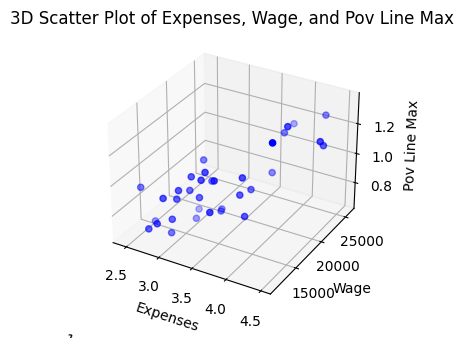

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(222, projection='3d')

# Plot the data points
ax.scatter(combined_df['expenses'], combined_df['wage'], combined_df['pov_line_max'], c='b', marker='o')

# Set the labels for each axis
ax.set_xlabel('Expenses')
ax.set_ylabel('Wage')
ax.set_zlabel('Pov Line Max')

# Set the title of the plot
ax.set_title('3D Scatter Plot of Expenses, Wage, and Pov Line Max')

# Show the plot
plt.show()


> Since the data points are quite small in number and the density appears to be quite the same between one another, the team agrees that K-Means clustering should be used.

###PART 4 : K-MEANS CLUSTERING

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


> Before moving on ahead, let's standardize the data first.

> Then, find the optimal number of clusters (*k*) using the Elbow Method.

In [11]:
# Step 1: Standardize the data
features = ['expenses', 'wage', 'pov_line_max']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_df[features])

In [12]:
# Step 2: Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

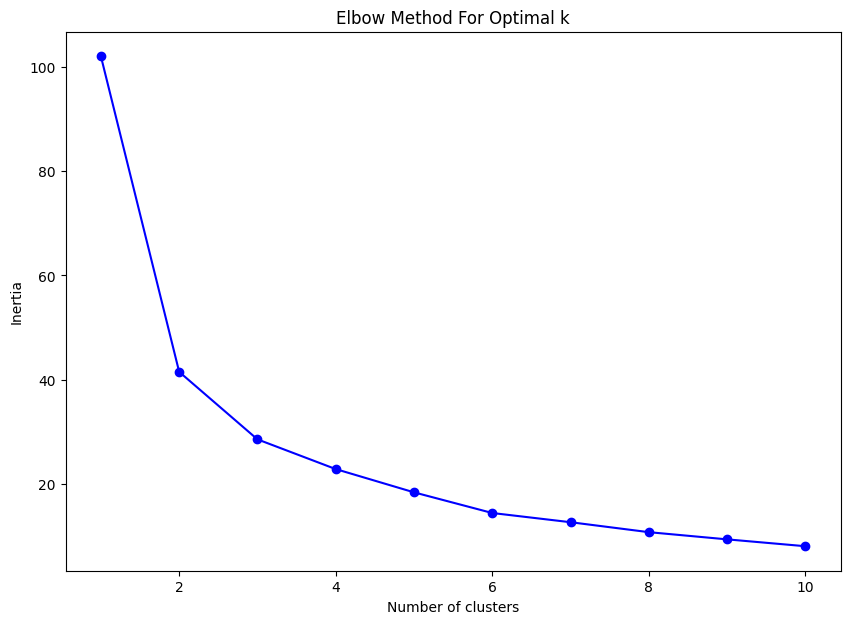

In [13]:
# Plot the Elbow curve
plt.figure(figsize=(10, 7))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

> The graph above shows that *k* = 3 would be ideal. Therefore, the number of resulting clusters will be 3.

> Since we now know everything we need, let's apply the K-Means Clustering function.

In [14]:
# Step 3: Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 3  # Replace this with the number you determine from the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
combined_df['cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


> To best see how the data points are clustered, we again visualize it in a color-labeled 3d plot.

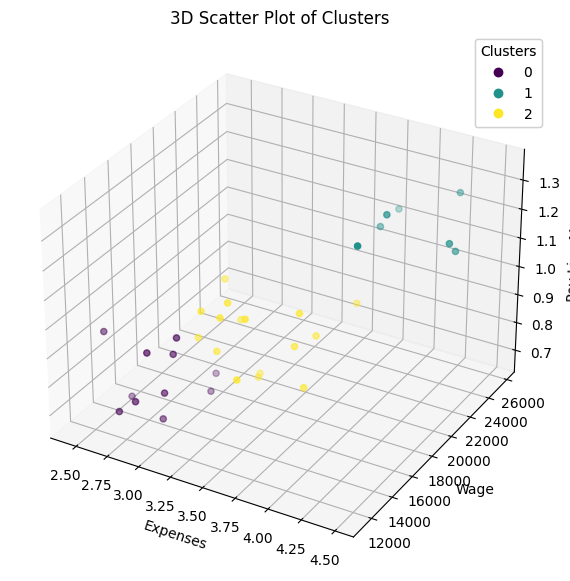

In [15]:
# Step 4: Visualize the clusters in a 3D plot
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded clusters
scatter = ax.scatter(combined_df['expenses'], combined_df['wage'], combined_df['pov_line_max'],
                     c=combined_df['cluster'], cmap='viridis')
# Set labels
ax.set_xlabel('Expenses')
ax.set_ylabel('Wage')
ax.set_zlabel('Pov Line Max')
ax.set_title('3D Scatter Plot of Clusters')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()

> And here's the data on each province and which cluster they belong to.

In [16]:
combined_df

,province,expenses,wage,pov_line_max,cluster
0,ACEH,3089863.375,15056.125,1015686.750,2
1,BALI,3824097.000,15763.125,825441.625,2
2,BANTEN,3814371.250,21037.750,947301.500,2
3,BENGKULU,3292523.750,15127.000,1068544.750,2
4,DI YOGYAKARTA,3513916.375,13300.625,892889.250,2
5,DKI JAKARTA,4240640.125,25782.500,1240815.625,1
6,GORONTALO,2941308.375,13164.375,680947.875,0
8,JAMBI,3278640.625,14585.625,1032545.875,2
9,JAWA BARAT,3388137.625,16785.000,768206.125,2
10,JAWA TENGAH,2760638.125,11335.875,744825.875,0


> Although the algorithm has successfully categorized the provinces into 3 clusters/categories, the meaning behind each cluster is still unknown.

> What needs to be found is the characteristics that separate each cluster with one another.
> * What does cluster 0 have in common or difference with cluster 1? Or cluster 2?

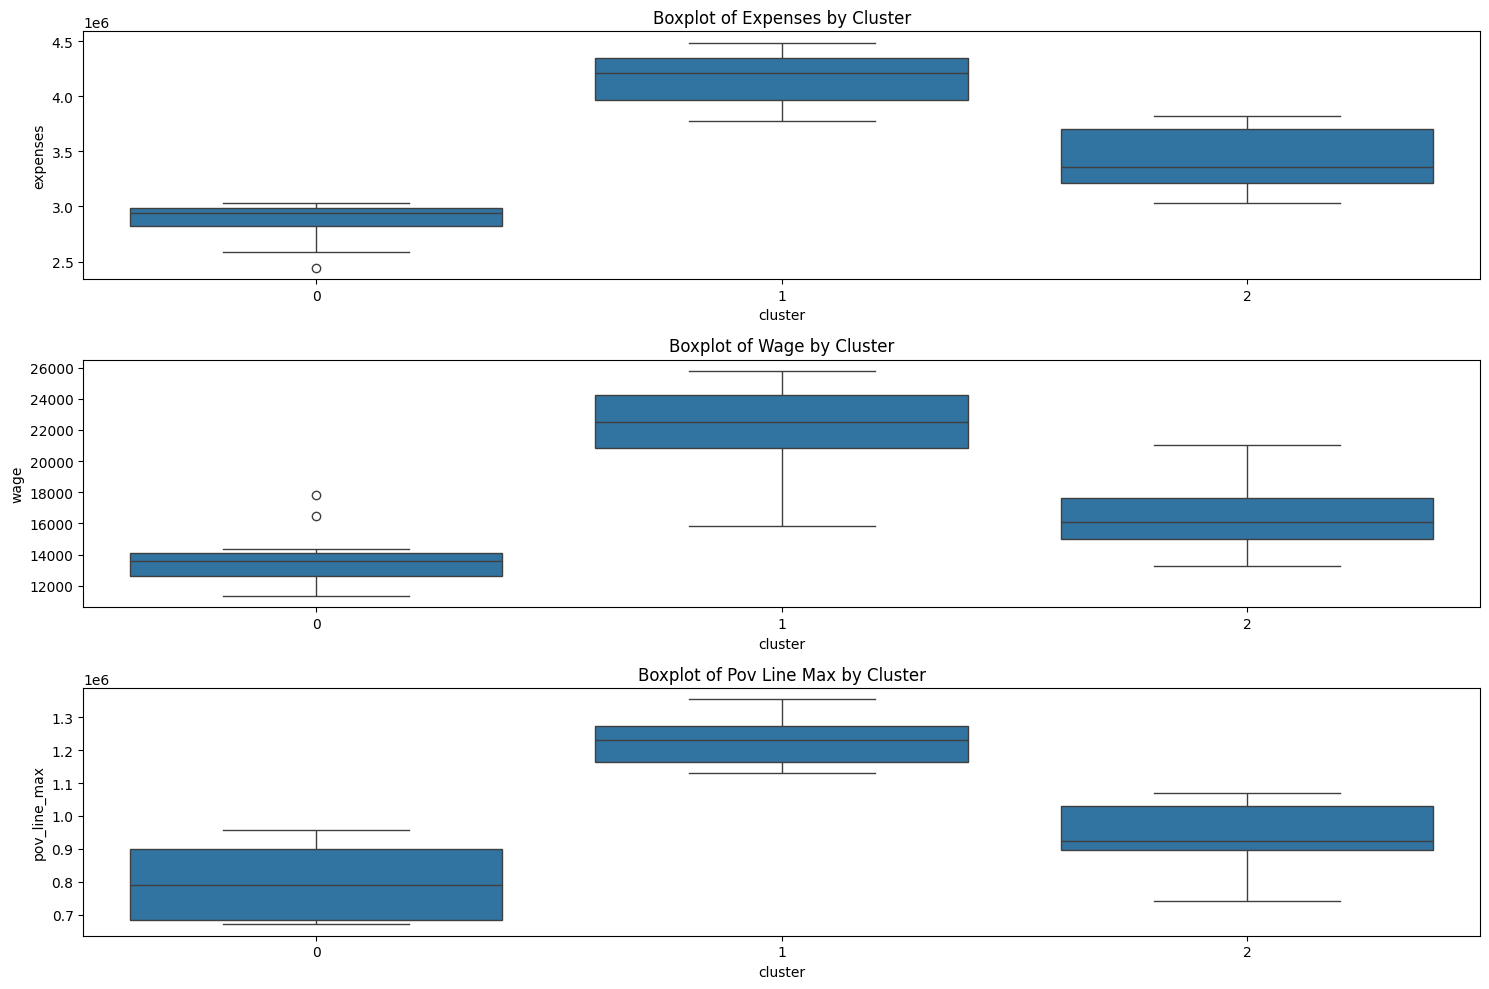

In [17]:
import seaborn as sns

# Step 7: Visualize cluster characteristics using boxplots
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
sns.boxplot(x='cluster', y='expenses', data=combined_df)
plt.title('Boxplot of Expenses by Cluster')

plt.subplot(3, 1, 2)
sns.boxplot(x='cluster', y='wage', data=combined_df)
plt.title('Boxplot of Wage by Cluster')

plt.subplot(3, 1, 3)
sns.boxplot(x='cluster', y='pov_line_max', data=combined_df)
plt.title('Boxplot of Pov Line Max by Cluster')

plt.tight_layout()
plt.show()


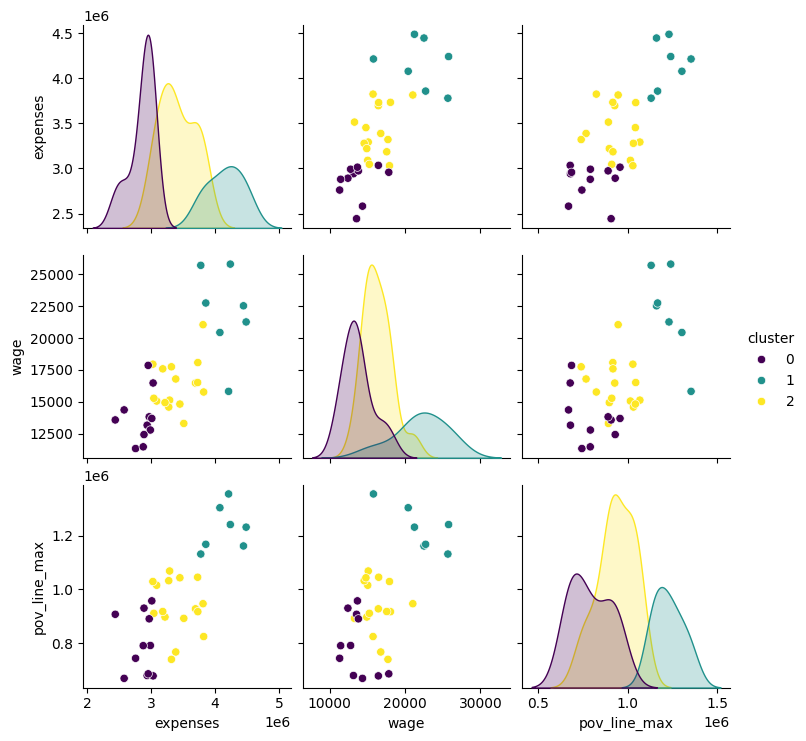

In [18]:
# Step 8: Visualize cluster characteristics using pair plot
sns.pairplot(combined_df, hue='cluster', vars=features, palette='viridis')
plt.show()

In [19]:
# Find the province with the highest poverty line
province_high_povline = combined_df.loc[combined_df['pov_line_max'].idxmax(), 'province']

# Find the province with the highest wage
province_high_wage = combined_df.loc[combined_df['wage'].idxmax(), 'province']

# Find the province with the highest expenses
province_high_expenses = combined_df.loc[combined_df['expenses'].idxmax(), 'province']

print("Province with highest poverty line:", province_high_povline)
print("Province with highest wage:", province_high_wage)
print("Province with highest expenses:", province_high_expenses)

Province with highest poverty line: KEP. BANGKA BELITUNG
Province with highest wage: DKI JAKARTA
Province with highest expenses: KALIMANTAN TIMUR


In [20]:
# Find the province with the highest poverty line
province_high_povline = combined_df.loc[combined_df['pov_line_max'].idxmin(), 'province']

# Find the province with the highest wage
province_high_wage = combined_df.loc[combined_df['wage'].idxmin(), 'province']

# Find the province with the highest expenses
province_high_expenses = combined_df.loc[combined_df['expenses'].idxmin(), 'province']

print("Province with lowest poverty line:", province_high_povline)
print("Province with lowest wage:", province_high_wage)
print("Province with lowest expenses:", province_high_expenses)

Province with lowest poverty line: SULAWESI BARAT
Province with lowest wage: JAWA TENGAH
Province with lowest expenses: NUSA TENGGARA TIMUR


In [21]:
combined_df.to_csv('copied_dataframe.csv', index=False)

In [22]:
# Count the number of provinces in each cluster
cluster_counts = combined_df['cluster'].value_counts()
print(cluster_counts)

cluster
2    16
0    11
1     7
Name: count, dtype: int64


In [23]:
# Map the cluster numbers to meaningful labels
cluster_labels = {
    0: 'Tier 3',
    1: 'Tier 1',
    2: 'Tier 2'
}

df_copy = combined_df.copy()
# Replace the cluster numbers with the labels
df_copy['cluster'] = df_copy['cluster'].replace(cluster_labels)


In [24]:
df_copy

,province,expenses,wage,pov_line_max,cluster
0,ACEH,3089863.375,15056.125,1015686.750,Tier 2
1,BALI,3824097.000,15763.125,825441.625,Tier 2
2,BANTEN,3814371.250,21037.750,947301.500,Tier 2
3,BENGKULU,3292523.750,15127.000,1068544.750,Tier 2
4,DI YOGYAKARTA,3513916.375,13300.625,892889.250,Tier 2
5,DKI JAKARTA,4240640.125,25782.500,1240815.625,Tier 1
6,GORONTALO,2941308.375,13164.375,680947.875,Tier 3
8,JAMBI,3278640.625,14585.625,1032545.875,Tier 2
9,JAWA BARAT,3388137.625,16785.000,768206.125,Tier 2
10,JAWA TENGAH,2760638.125,11335.875,744825.875,Tier 3


In [25]:
df_copy['wage'] = df_copy['wage'] * 42 * 4

In [38]:
df_copy

,province,expenses,wage,pov_line_max,cluster,gap
17,KEP. BANGKA BELITUNG,4213648.875,2656857.0,1354355.375,Tier 1,1556791.875
16,KALIMANTAN UTARA,4077647.000,3431631.0,1303209.250,Tier 1,646016.000
5,DKI JAKARTA,4240640.125,4331460.0,1240815.625,Tier 1,-90819.875
15,KALIMANTAN TIMUR,4487493.125,3570336.0,1231180.875,Tier 1,917157.125
25,PAPUA BARAT,3857634.625,3819564.0,1167587.125,Tier 1,38070.625
18,KEP. RIAU,4445915.625,3782814.0,1161416.500,Tier 1,663101.625
24,PAPUA,3779068.625,4315416.0,1131475.875,Tier 1,-536347.375
3,BENGKULU,3292523.750,2541336.0,1068544.750,Tier 2,751187.750
26,RIAU,3730012.500,2773155.0,1045432.500,Tier 2,956857.500
32,SUMATERA BARAT,3452670.500,2489634.0,1043435.250,Tier 2,963036.500


In [26]:
# Filter and print provinces for each tier
tier_1_provinces = df_copy[df_copy['cluster'] == 'Tier 1']['province']
tier_2_provinces = df_copy[df_copy['cluster'] == 'Tier 2']['province']
tier_3_provinces = df_copy[df_copy['cluster'] == 'Tier 3']['province']

In [27]:
print("Tier 1 Provinces:")
print(tier_1_provinces.to_list())

Tier 1 Provinces:
['DKI JAKARTA', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA', 'KEP. BANGKA BELITUNG', 'KEP. RIAU', 'PAPUA', 'PAPUA BARAT']


In [28]:

print("\nTier 2 Provinces:")
print(tier_2_provinces.to_list())



Tier 2 Provinces:
['ACEH', 'BALI', 'BANTEN', 'BENGKULU', 'DI YOGYAKARTA', 'JAMBI', 'JAWA BARAT', 'KALIMANTAN BARAT', 'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH', 'MALUKU', 'MALUKU UTARA', 'RIAU', 'SULAWESI TENGAH', 'SULAWESI UTARA', 'SUMATERA BARAT']


In [29]:

print("\nTier 3 Provinces:")
print(tier_3_provinces.to_list())


Tier 3 Provinces:
['GORONTALO', 'JAWA TENGAH', 'JAWA TIMUR', 'LAMPUNG', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'SULAWESI BARAT', 'SULAWESI SELATAN', 'SULAWESI TENGGARA', 'SUMATERA SELATAN', 'SUMATERA UTARA']


In [39]:

# Count the number of provinces in each tier
tier_counts = df_copy['cluster'].value_counts()

# Calculate the percentage of provinces in each tier
total_provinces = len(df_copy)
tier_percentages = (tier_counts / total_provinces) * 100

print("Percentage of provinces in each tier:")
print(tier_percentages)

Percentage of provinces in each tier:
cluster
Tier 2    47.058824
Tier 3    32.352941
Tier 1    20.588235
Name: count, dtype: float64


In [30]:
# Check if there are any provinces where wage is higher than expenses
provinces_with_higher_wage = df_copy[df_copy['wage'] > df_copy['expenses']]['province']

if len(provinces_with_higher_wage) > 0:
    print("Provinces with higher wage than expenses:")
    print(provinces_with_higher_wage.tolist())
else:
    print("No provinces have a wage higher than expenses.")

Provinces with higher wage than expenses:
['DKI JAKARTA', 'PAPUA', 'SULAWESI TENGGARA']


In [33]:
# Calculate the multiplied wage (wage * 42 * 4) and the gap between expenses and multiplied wage
df_copy['gap'] = df_copy['expenses'] - df_copy['wage']
df_copy = df_copy.sort_values(by='gap', ascending=False)

# Select the top 3 provinces with the biggest gap between expenses and multiplied wage
top_3_provinces = df_copy.head(3)

print(top_3_provinces[['province', 'expenses', 'wage', 'gap']])

                province     expenses       wage          gap
17  KEP. BANGKA BELITUNG  4213648.875  2656857.0  1556791.875
4          DI YOGYAKARTA  3513916.375  2234505.0  1279411.375
1                   BALI  3824097.000  2648205.0  1175892.000


In [34]:
# Sort the DataFrame by 'pov_line_max' in descending order
df_copy = df_copy.sort_values(by='pov_line_max', ascending=False)

# Select the top 3 provinces with the highest poverty line
top_3_provinces = df_copy.head(3)

print(top_3_provinces[['province', 'pov_line_max']])

                province  pov_line_max
17  KEP. BANGKA BELITUNG   1354355.375
16      KALIMANTAN UTARA   1303209.250
5            DKI JAKARTA   1240815.625


In [36]:
# Group the DataFrame by 'cluster' and find the highest and lowest wage in each tier
tier_stats = df_copy.groupby('cluster')['wage'].agg([('Highest Monthly Wage', 'max'), ('Lowest Monthly Wage', 'min')]).reset_index()
print(tier_stats)

  cluster  Highest Monthly Wage  Lowest Monthly Wage
0  Tier 1             4331460.0            2656857.0
1  Tier 2             3534342.0            2234505.0
2  Tier 3             2998695.0            1904427.0


In [37]:
# Group the DataFrame by 'cluster' and find the highest and lowest wage in each tier
tier_stats_2 = df_copy.groupby('cluster')['expenses'].agg([('Highest Monthly Expenses', 'max'), ('Lowest Monthly Expenses', 'min')]).reset_index()
print(tier_stats_2)

  cluster  Highest Monthly Expenses  Lowest Monthly Expenses
0  Tier 1               4487493.125              3779068.625
1  Tier 2               3824097.000              3030715.375
2  Tier 3               3034482.500              2442958.000
